<a href="https://colab.research.google.com/github/AlejandroDova/sing-lenguaje-tensorflow/blob/main/mainproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O /tmp/sign-language-img.zip

--2023-09-02 20:34:56--  https://storage.googleapis.com/platzi-tf2/sign-language-img.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24265584 (23M) [application/zip]
Saving to: ‘/tmp/sign-language-img.zip’

/tmp/sign-language- 100%[===================>]  23.14M  9.76MB/s    in 2.4s    

2023-09-02 20:34:59 (9.76 MB/s) - ‘/tmp/sign-language-img.zip’ saved [24265584/24265584]



In [ ]:
import os
import zipfile

local_zip = "/tmp/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/tmp/sign-language-img-img")
zip_ref.close()


In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/tmp/sign-language-img-img/Train"
test_dir = "/tmp/sign-language-img-img/Test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28,28),
    batch_size = 128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 128,
    class_mode='categorical',
    color_mode = 'grayscale'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]

In [ ]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

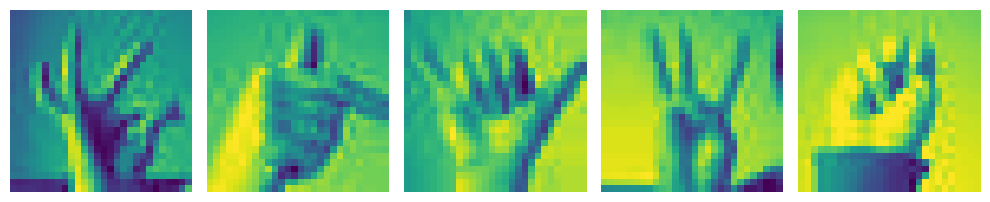

In [ ]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

In [ ]:
model_base = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(len(classes), activation = "softmax")]
)

In [ ]:
model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history = model_base.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 15s 42ms/step - loss: 2.2065 - accuracy: 0.3514 - val_loss: 1.7270 - val_accuracy: 0.4954
Epoch 2/20
215/215 [==============================] - 7s 34ms/step - loss: 1.2485 - accuracy: 0.6213 - val_loss: 1.3405 - val_accuracy: 0.6105
Epoch 3/20
215/215 [==============================] - 8s 37ms/step - loss: 0.8802 - accuracy: 0.7320 - val_loss: 1.1641 - val_accuracy: 0.6414
Epoch 4/20
215/215 [==============================] - 9s 40ms/step - loss: 0.6477 - accuracy: 0.8040 - val_loss: 1.1211 - val_accuracy: 0.6526
Epoch 5/20
215/215 [==============================] - 8s 38ms/step - loss: 0.4847 - accuracy: 0.8597 - val_loss: 1.0628 - val_accuracy: 0.6814
Epoch 6/20
215/215 [==============================] - 7s 34ms/step - loss: 0.3693 - accuracy: 0.8948 - val_loss: 1.0198 - val_accuracy: 0.6863
Epoch 7/20
215/215 [==============================] - 7s 34ms/step - loss: 0.2817 - accuracy: 0.9246 - val_loss: 1.0737 - val_accuracy: 0.726

In [ ]:
results = model_base.evaluate(test_generator)

NameError: ignored

In [ ]:
def visualizacion_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1, 2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label = "Validation accuracy")
  ax[0].set_title("Train and Val accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label = "Train Loss")
  ax[1].plot(epochs, val_loss, "ro-", label = "Validation Loss")
  ax[1].set_title("Train and Val loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

In [ ]:
visualizacion_resultados(history)

NameError: ignored

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_optimizer = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = "softmax")]
)

model_optimizer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
Total params: 236,952
Trainable params: 236,952
Non-tr

In [ ]:
model_optimizer.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 10s 39ms/step - loss: 2.5397 - accuracy: 0.2307 - val_loss: 1.8105 - val_accuracy: 0.4512
Epoch 2/20
215/215 [==============================] - 8s 39ms/step - loss: 1.5834 - accuracy: 0.4783 - val_loss: 1.3818 - val_accuracy: 0.5607
Epoch 3/20
215/215 [==============================] - 8s 36ms/step - loss: 1.2230 - accuracy: 0.5881 - val_loss: 1.1829 - val_accuracy: 0.6084
Epoch 4/20
215/215 [==============================] - 8s 39ms/step - loss: 1.0013 - accuracy: 0.6643 - val_loss: 1.0144 - val_accuracy: 0.6547
Epoch 5/20
215/215 [==============================] - 8s 39ms/step - loss: 0.8611 - accuracy: 0.7110 - val_loss: 1.0313 - val_accuracy: 0.6786
Epoch 6/20
215/215 [==============================] - 8s 39ms/step - loss: 0.7464 - accuracy: 0.7429 - val_loss: 0.9814 - val_accuracy: 0.6849
Epoch 7/20
215/215 [==============================] - 8s 35ms/step - loss: 0.6557 - accuracy: 0.7758 - val_loss: 0.8857 - val_accuracy: 0.739

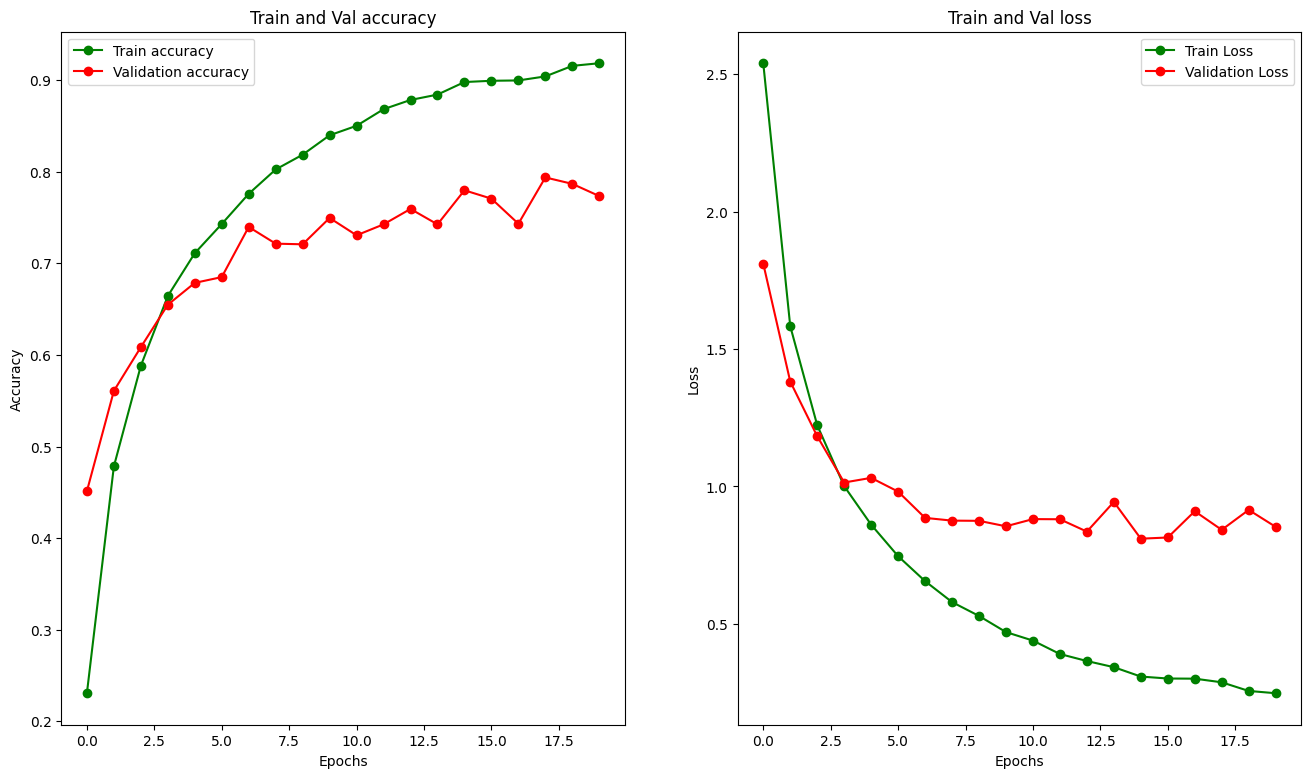

In [ ]:
visualizacion_resultados(history_optimizer)

In [ ]:
model_convolutional = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()


model_convolutional.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

KeyboardInterrupt: ignored

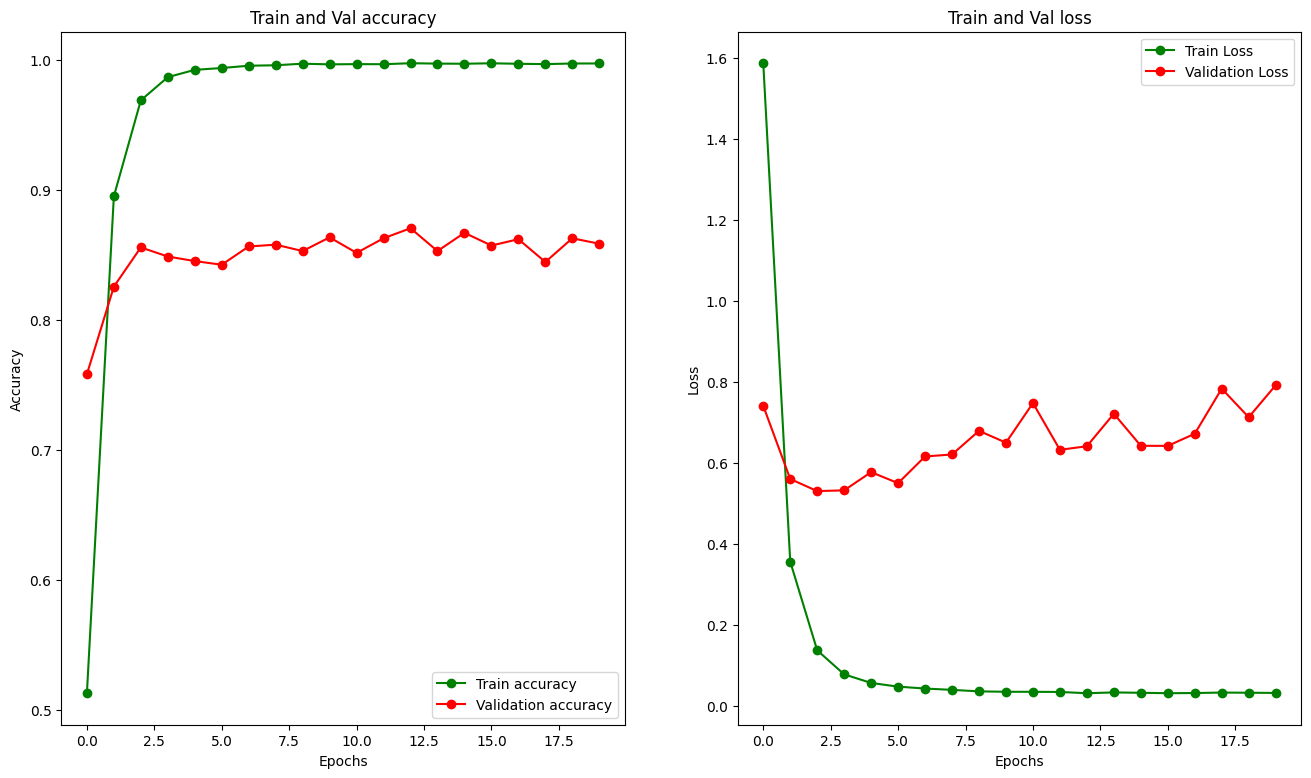

In [ ]:
visualizacion_resultados(history_convolutional)

In [ ]:
model_callback = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12675)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos nuestro modelo")
      self.model.stop_training = True

In [ ]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20


KeyboardInterrupt: ignored

In [ ]:
def get_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation = "softmax")
])
  return model

In [ ]:
model_early = get_model()
model_early.summary()

model_callback.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 12675)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 3, mode = "auto")

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 3, mode = "auto")

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt
from tensorflow import keras

<ipython-input-27-cc088a1dfb14>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28,28,1)))
  model.add(tf.keras.layers.MaxPooling2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units = hp_units, activation = "relu", kernel_regularizer = regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice("learning_rate", values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate), loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

In [ ]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective = "val_accuracy",
    max_epochs = 20,
    factor = 3,
    directory = "models/",
    project_name = "platzi-tunner"
)

In [ ]:
tuner.search(train_generator, epochs = 20, validation_data = validation_generator)
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

Trial 30 Complete [00h 03m 28s]
val_accuracy: 0.8238596320152283

Best val_accuracy So Far: 0.87578946352005
Total elapsed time: 00h 43m 13s


In [ ]:
print(best_hps.get("units"))

256


In [ ]:
print(best_hps.get("learning_rate"))

0.001


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 14s 46ms/step - loss: 1.8326 - accuracy: 0.4457 - val_loss: 0.8980 - val_accuracy: 0.6968
Epoch 2/20
215/215 [==============================] - 9s 41ms/step - loss: 0.4767 - accuracy: 0.8499 - val_loss: 0.6404 - val_accuracy: 0.7916
Epoch 3/20
215/215 [==============================] - 9s 42ms/step - loss: 0.2053 - accuracy: 0.9460 - val_loss: 0.5851 - val_accuracy: 0.8239
Epoch 4/20
215/215 [==============================] - 10s 46ms/step - loss: 0.1157 - accuracy: 0.9748 - val_loss: 0.6447 - val_accuracy: 0.8288
Epoch 5/20
215/215 [==============================] - 10s 46ms/step - loss: 0.0771 - accuracy: 0.9862 - val_loss: 0.6525 - val_accuracy: 0.8302
Epoch 6/20
215/215 [==============================] - 11s 49ms/step - loss: 0.0632 - accuracy: 0.9891 - val_loss: 0.7457 - val_accuracy: 0.8351
Epoch 7/20
215/215 [==============================] - 10s 46ms/step - loss: 0.0556 - accuracy: 0.9909 - val_loss: 0.7383 - val_accuracy: 0

In [ ]:
config_dict = hypermodel.get_config()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_same_config = tf.keras.Sequential.from_config(config_dict)

In [ ]:
model_same_config.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12675)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_weight = get_model()
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
checkpoint_path = "model_checkpoints/checkpoint"
checkpoint_weight = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weight_only = True,
    verbose = 1

    )

In [ ]:
history_weight = model_weight.fit( train_generator, epochs = 20, callbacks = [checkpoint_weight], validation_data = validation_generator )

Epoch 1/20
215/215 [==============================] - ETA: 0s - loss: 1.5738 - accuracy: 0.5276
Epoch 1: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 13s 52ms/step - loss: 1.5738 - accuracy: 0.5276 - val_loss: 0.7528 - val_accuracy: 0.7474
Epoch 2/20
214/215 [============================>.] - ETA: 0s - loss: 0.3173 - accuracy: 0.9128
Epoch 2: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 53ms/step - loss: 0.3164 - accuracy: 0.9131 - val_loss: 0.6318 - val_accuracy: 0.8161
Epoch 3/20
214/215 [============================>.] - ETA: 0s - loss: 0.1223 - accuracy: 0.9750
Epoch 3: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 13s 61ms/step - loss: 0.1221 - accuracy: 0.9751 - val_loss: 0.6060 - val_accuracy: 0.8379
Epoch 4/20
215/215 [==============================] - ETA: 0s - loss: 0.0694 - accuracy: 0.9898
Epoch 4: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 12s 58ms/step - loss: 0.0694 - accuracy: 0.9898 - val_loss: 0.6397 - val_accuracy: 0.8435
Epoch 5/20
214/215 [============================>.] - ETA: 0s - loss: 0.0514 - accuracy: 0.9943
Epoch 5: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 50ms/step - loss: 0.0515 - accuracy: 0.9943 - val_loss: 0.6048 - val_accuracy: 0.8554
Epoch 6/20
215/215 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9953
Epoch 6: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 51ms/step - loss: 0.0443 - accuracy: 0.9953 - val_loss: 0.7027 - val_accuracy: 0.8344
Epoch 7/20
215/215 [==============================] - ETA: 0s - loss: 0.0384 - accuracy: 0.9972
Epoch 7: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 52ms/step - loss: 0.0384 - accuracy: 0.9972 - val_loss: 0.7323 - val_accuracy: 0.8456
Epoch 8/20
214/215 [============================>.] - ETA: 0s - loss: 0.0374 - accuracy: 0.9970
Epoch 8: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 53ms/step - loss: 0.0374 - accuracy: 0.9970 - val_loss: 0.7107 - val_accuracy: 0.8568
Epoch 9/20
215/215 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9978
Epoch 9: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 50ms/step - loss: 0.0336 - accuracy: 0.9978 - val_loss: 0.7684 - val_accuracy: 0.8491
Epoch 10/20
214/215 [============================>.] - ETA: 0s - loss: 0.0359 - accuracy: 0.9970
Epoch 10: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 10s 47ms/step - loss: 0.0359 - accuracy: 0.9970 - val_loss: 0.6851 - val_accuracy: 0.8505
Epoch 11/20
215/215 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9975
Epoch 11: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 52ms/step - loss: 0.0337 - accuracy: 0.9975 - val_loss: 0.7272 - val_accuracy: 0.8442
Epoch 12/20
215/215 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9981
Epoch 12: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 52ms/step - loss: 0.0323 - accuracy: 0.9981 - val_loss: 0.6774 - val_accuracy: 0.8547
Epoch 13/20
214/215 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9979
Epoch 13: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 51ms/step - loss: 0.0309 - accuracy: 0.9979 - val_loss: 0.7653 - val_accuracy: 0.8568
Epoch 14/20
214/215 [============================>.] - ETA: 0s - loss: 0.0289 - accuracy: 0.9988
Epoch 14: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 53ms/step - loss: 0.0289 - accuracy: 0.9988 - val_loss: 0.7710 - val_accuracy: 0.8582
Epoch 15/20
215/215 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9980
Epoch 15: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 51ms/step - loss: 0.0305 - accuracy: 0.9980 - val_loss: 0.8957 - val_accuracy: 0.8386
Epoch 16/20
215/215 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 0.9983
Epoch 16: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 10s 48ms/step - loss: 0.0297 - accuracy: 0.9983 - val_loss: 0.8608 - val_accuracy: 0.8477
Epoch 17/20
214/215 [============================>.] - ETA: 0s - loss: 0.0313 - accuracy: 0.9977
Epoch 17: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 49ms/step - loss: 0.0313 - accuracy: 0.9977 - val_loss: 0.7590 - val_accuracy: 0.8526
Epoch 18/20
214/215 [============================>.] - ETA: 0s - loss: 0.0299 - accuracy: 0.9979
Epoch 18: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 12s 57ms/step - loss: 0.0301 - accuracy: 0.9979 - val_loss: 0.8038 - val_accuracy: 0.8547
Epoch 19/20
215/215 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9975
Epoch 19: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 10s 48ms/step - loss: 0.0317 - accuracy: 0.9975 - val_loss: 0.9252 - val_accuracy: 0.8428
Epoch 20/20
214/215 [============================>.] - ETA: 0s - loss: 0.0359 - accuracy: 0.9968
Epoch 20: saving model to model_checkpoints/checkpoint


215/215 [==============================] - 11s 51ms/step - loss: 0.0358 - accuracy: 0.9968 - val_loss: 0.6921 - val_accuracy: 0.8667


In [ ]:
model_weight.save("model_manual/my_model")

In [ ]:
model_weights2 = get_model()
model_weights2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model_weights2.load_weights(checkpoint_path)

In [ ]:
model_weights2.evaluate(test_generator)

57/57 [==============================] - 4s 71ms/step - loss: 0.7022 - accuracy: 0.8663


[0.7021760940551758, 0.8662855625152588]

In [ ]:
model_weight.evaluate(test_generator)

57/57 [==============================] - 3s 46ms/step - loss: 0.7022 - accuracy: 0.8663


[0.7021759152412415, 0.8662855625152588]

In [ ]:
 checkpoint_path = "model_checkpoints_complete"

 checkpoint_weight = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weight_only = False,
    monitor = "val_accuracy",
    save_best_only = True,
    verbose = 1 )

In [ ]:
model_complete = get_model()
model_complete.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
    )

In [ ]:
history_complete = model_complete.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weight],
    validation_data = validation_generator )

Epoch 1/20
215/215 [==============================] - ETA: 0s - loss: 1.7346 - accuracy: 0.4741
Epoch 1: val_accuracy improved from -inf to 0.74526, saving model to model_checkpoints_complete


215/215 [==============================] - 13s 52ms/step - loss: 1.7346 - accuracy: 0.4741 - val_loss: 0.8135 - val_accuracy: 0.7453
Epoch 2/20
214/215 [============================>.] - ETA: 0s - loss: 0.4020 - accuracy: 0.8795
Epoch 2: val_accuracy improved from 0.74526 to 0.83298, saving model to model_checkpoints_complete


215/215 [==============================] - 11s 52ms/step - loss: 0.4010 - accuracy: 0.8798 - val_loss: 0.5487 - val_accuracy: 0.8330
Epoch 3/20
215/215 [==============================] - ETA: 0s - loss: 0.1523 - accuracy: 0.9653
Epoch 3: val_accuracy improved from 0.83298 to 0.85193, saving model to model_checkpoints_complete


215/215 [==============================] - 12s 54ms/step - loss: 0.1523 - accuracy: 0.9653 - val_loss: 0.5343 - val_accuracy: 0.8519
Epoch 4/20
215/215 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9839
Epoch 4: val_accuracy improved from 0.85193 to 0.86386, saving model to model_checkpoints_complete


215/215 [==============================] - 12s 58ms/step - loss: 0.0878 - accuracy: 0.9839 - val_loss: 0.5742 - val_accuracy: 0.8639
Epoch 5/20
214/215 [============================>.] - ETA: 0s - loss: 0.0630 - accuracy: 0.9902
Epoch 5: val_accuracy did not improve from 0.86386
215/215 [==============================] - 10s 45ms/step - loss: 0.0629 - accuracy: 0.9902 - val_loss: 0.6165 - val_accuracy: 0.8484
Epoch 6/20
214/215 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.9945
Epoch 6: val_accuracy improved from 0.86386 to 0.86947, saving model to model_checkpoints_complete


215/215 [==============================] - 11s 51ms/step - loss: 0.0505 - accuracy: 0.9944 - val_loss: 0.6177 - val_accuracy: 0.8695
Epoch 7/20
214/215 [============================>.] - ETA: 0s - loss: 0.0464 - accuracy: 0.9952
Epoch 7: val_accuracy improved from 0.86947 to 0.87298, saving model to model_checkpoints_complete


215/215 [==============================] - 11s 52ms/step - loss: 0.0464 - accuracy: 0.9953 - val_loss: 0.6131 - val_accuracy: 0.8730
Epoch 8/20
215/215 [==============================] - ETA: 0s - loss: 0.0416 - accuracy: 0.9957
Epoch 8: val_accuracy improved from 0.87298 to 0.87719, saving model to model_checkpoints_complete


215/215 [==============================] - 13s 60ms/step - loss: 0.0416 - accuracy: 0.9957 - val_loss: 0.6285 - val_accuracy: 0.8772
Epoch 9/20
215/215 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9964
Epoch 9: val_accuracy did not improve from 0.87719
215/215 [==============================] - 10s 44ms/step - loss: 0.0392 - accuracy: 0.9964 - val_loss: 0.6825 - val_accuracy: 0.8758
Epoch 10/20
215/215 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9962
Epoch 10: val_accuracy did not improve from 0.87719
215/215 [==============================] - 9s 42ms/step - loss: 0.0389 - accuracy: 0.9962 - val_loss: 0.6408 - val_accuracy: 0.8751
Epoch 11/20
215/215 [==============================] - ETA: 0s - loss: 0.0372 - accuracy: 0.9968
Epoch 11: val_accuracy did not improve from 0.87719
215/215 [==============================] - 10s 46ms/step - loss: 0.0372 - accuracy: 0.9968 - val_loss: 0.6795 - val_accuracy: 0.8674
Epoch 12/20
215/215 [===

In [ ]:
model_complete.save("saved_model_complete/mymodel")

In [ ]:
model_complete3 = tf.keras.models.load_model("saved_model_complete/mymodel")

In [ ]:
model_complete3.evaluate(test_generator)

57/57 [==============================] - 3s 38ms/step - loss: 0.7639 - accuracy: 0.8859


[0.7638944983482361, 0.8859453201293945]

In [ ]:
model_complete.evaluate(test_generator)

57/57 [==============================] - 2s 43ms/step - loss: 0.7639 - accuracy: 0.8859


[0.7638944387435913, 0.8859453201293945]

In [ ]:
!pip install pyyaml h5py

In [ ]:
model_complete3.save("my_model.h5")
model_complete4 = tf.keras.models.load_model("my_model.h5")

In [ ]:
model_complete4.evaluate(test_generator)

57/57 [==============================] - 3s 45ms/step - loss: 0.7639 - accuracy: 0.8859


[0.7638944387435913, 0.8859453201293945]

In [ ]:
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "training"
)

validation_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
    subset = "validation"
)

test_generator_resize = train_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "rgb",
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(
    include_top = False,
    input_tensor = tf.keras.layers.Input(shape = (150, 150, 3))
)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                      

In [ ]:
last_layers = pre_trained_model.get_layer("mixed7")
last_output = last_layers.output

In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(classes), activation = "softmax")(x)

model_keras = tf.keras.Model(pre_trained_model.input, x)

model_keras.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_keras.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
history_keras = model_keras.fit(
    train_generator_resize,
    epochs = 5,
    validation_data = validation_generator_resize
)

Epoch 1/5
215/215 [==============================] - 49s 159ms/step - loss: 0.1601 - accuracy: 0.9540 - val_loss: 0.0687 - val_accuracy: 0.9804
Epoch 2/5
215/215 [==============================] - 31s 146ms/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 0.0705 - val_accuracy: 0.9789
Epoch 3/5
215/215 [==============================] - 31s 143ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.0696 - val_accuracy: 0.9825
Epoch 4/5
215/215 [==============================] - 31s 142ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0391 - val_accuracy: 0.9888
Epoch 5/5
215/215 [==============================] - 30s 139ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0633 - val_accuracy: 0.9881


In [ ]:
import tensorflow_hub as hub

In [ ]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"

model_hub = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (150, 150, 3)),
    hub.KerasLayer(module_url, trainable = False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(len(classes), activation = "softmax")
])